In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os

In [3]:
workdir = '/Users/diana/Dropbox/UW/Research/rasm'
flux_file = 'fluxes_monthly_secondrun.1948-01.nc'
data = xr.open_dataset(os.path.join(workdir, flux_file))

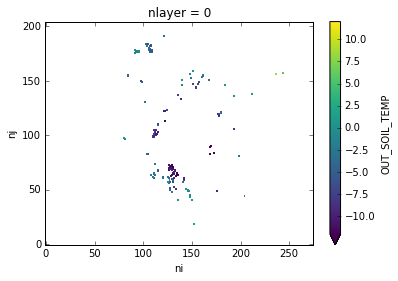

In [11]:
data.OUT_SOIL_TEMP.sel(nlayer=0).mean('time').plot(vmin=-12, vmax=12)

73
130
m is -0.000651, y intercept is -12.062121


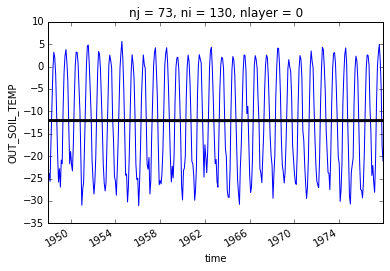

In [42]:
barrow_lat = 71.316667
barrow_lng = 203.400000
nlayer = 0
domain_file = xr.open_dataset(os.path.join('/Users/diana/Dropbox/UW/Research/rasm',
                                          'domain.lnd.wr50a_ar9v4.130607.nc'))

min_arg = (((domain_file.xc - barrow_lng)**2) + 
               ((domain_file.yc - barrow_lat)**2)).argmin()
nj_ind, ni_ind = np.unravel_index(min_arg, domain_file.xc.shape)   
print(nj_ind)
print(ni_ind)
# data.OUT_SOIL_TEMP
data.OUT_SOIL_TEMP[:, :, nj_ind, ni_ind].sel(nlayer=nlayer).plot()
ts0 = data.OUT_SOIL_TEMP[:, :, nj_ind, ni_ind].sel(nlayer=nlayer)
# plt.plot(np.unique(data.time), np.poly1d(np.polyfit(data.time, ts0, 1))(np.unique(data.time)))
m, b = np.polyfit(np.arange(0, len(data.time.values)), ts0, 1)
plt.plot(data.time, m*ts0 + b, '-', color='k', linewidth=3.0)
print("m is %f, y intercept is %f" %(m, b))

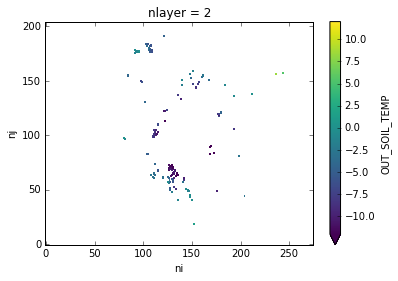

In [13]:
data.OUT_SOIL_TEMP.sel(nlayer=2).mean('time').plot(vmin=-12, vmax=12)